# Data wrangling project

**Importing needed python libraries**

In [526]:
#importing all needed libraries
import numpy as np
import pandas as pd
import os
import requests
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data wrangling

## I.Gathering data from multiple sources
**1- twitter_archive_enhanced.csv**

**2- image_predictions.tsv**

**3- tweet_json.txt**


### 1- Reading twitter_archive_enhanced.csv file

In [527]:
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced-2.csv')
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2- Downloading the tsv file programmatically using the Requests library

In [528]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, 
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [529]:
df_tweet_image_predictions = pd.read_csv('image_predictions/image-predictions.tsv' , sep = '\t')
df_tweet_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [530]:
df_tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3- Importing tweet_json.txt 

***I tried to get the authority to access API. Unfurtunatly, Twitter refused. So, i downloaded Json file directly from Udacity server***

In [531]:
df_tweet_Json = pd.read_json('tweet-json.txt' , lines=True)
df_tweet_Json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [532]:
df_tweet_Json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

## II.Assesing 

In [533]:
df_twitter_archive_enhanced.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Bailey        7
Toby          7
an            7
Buddy         7
Leo           6
Jack          6
Jax           6
Rusty         6
Dave          6
Scout         6
Koda          6
Milo          6
Bella         6
Oscar         6
Stanley       6
very          5
           ... 
Cheesy        1
JD            1
Stewie        1
Linus         1
Willy         1
Coleman       1
Divine        1
Crimson       1
Wafer         1
Tripp         1
Crawford      1
Jeffri        1
Nida          1
Loomis        1
Kevon         1
Rizzo         1
Taz           1
Dylan         1
Dewey         1
Geno          1
Barney        1
Filup         1
Lillie        1
Gustaf        1
Huck          1
Tango         1
Blakely       1
Sparky        1
Darby         1
Pancake       1
Name: name, Length: 957,

In [534]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [535]:
sum(df_twitter_archive_enhanced.name.duplicated())

1399

In [536]:
df_twitter_archive_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [537]:
df_twitter_archive_enhanced.retweeted_status_timestamp.dtype

dtype('O')

In [538]:
df_twitter_archive_enhanced.timestamp.dtype

dtype('O')

In [539]:
df_twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [540]:
df_twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64


**Tidiness issues :**

1- Merge all data frames with each other 

**Twitter_archive_enhanced file:**

2- Merge the following columns (doggo,floofer,pupper,puppo) into one descriptive column like type_of_dog 


**Quality issue:** 

**Twitter_archive_enhanced file:**

1- 745 of dogs with no name 

Wrong data type:

2- timestamp

3- retweeted_status_timestamp

4- Some denominators are not equal to 10

5- Some numerators are less than 10

6- Creating rating column instead of numerators and denominators columns

7- Removing retweet columns 

8- 1399 duplicate data in name column

9- Convert tweet_id to object

10- Rename id column to tweet_id in Jason file

## III.Cleaning

In [541]:
#Copy of all dataframes
twitter_archive_clean = df_twitter_archive_enhanced.copy()
image_predictions_clean = df_tweet_image_predictions.copy()
tweet_Json_clean = df_tweet_Json.copy()

First, i tackled *tidiness issues* (three of them)

**Define**

Rename id column to tweet_id in tweet_Json_clean

**code**

In [542]:
#to mearge all dataframes with each other fisrt i need to rename id column in tweet_Json_clean to tweet_id
tweet_Json_clean.rename(columns={'id':'tweet_id'}, inplace= True)

**Test**

In [543]:
tweet_Json_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

**Define**

Merge all dataframes into one master dataframe

**Code**

In [544]:
# merge 'twitter_archive_clean' and 'tweet_Json_clean'
df_master = pd.merge(twitter_archive_clean, tweet_Json_clean,
                                   how = 'inner', on = 'tweet_id')
# merge 'df_master' and 'image_predictions_clean'
df_master = pd.merge(df_master, image_predictions_clean,
                                   how = 'inner', on = 'tweet_id')

**Test**

In [545]:
df_master

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [546]:
# copy the master dataframe to clean our data
df_master_clean = df_master.copy()

**Define**

Replace None with Nan in 'doggo', 'floofer', 'pupper', 'puppo' columns

**Code**

In [547]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']
for col in col_list:
    df_master_clean[col] = df_master_clean[col].replace('None',np.nan)

**Test**

In [548]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 58 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
doggo                            80 non-null object
floofer                          8 non-null object
pupper                           221 non-null object
puppo                            24 non-null

**Define**

Merge the following columns (doggo,floofer,pupper,puppo) into one descriptive column like type_of_dog



**Code**

In [549]:
value_variables = ['doggo', 'floofer', 'pupper', 'puppo']
Id_variables = [x for x in df_master_clean.columns.tolist() if x not in value_variables]

In [550]:
df_master_clean = pd.melt(df_master_clean, id_vars = Id_variables, value_vars = value_variables, 
                         var_name = 'types', value_name = 'types_of_dogs')

In [551]:
df_master_clean = df_master_clean.drop('types', 1)

**Test**

In [552]:
df_master_clean.types_of_dogs.value_counts()

pupper     221
doggo       80
puppo       24
floofer      8
Name: types_of_dogs, dtype: int64

In [553]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8292 entries, 0 to 8291
Data columns (total 55 columns):
tweet_id                         8292 non-null int64
in_reply_to_status_id_x          92 non-null float64
in_reply_to_user_id_x            92 non-null float64
timestamp                        8292 non-null object
source_x                         8292 non-null object
text                             8292 non-null object
retweeted_status_id              316 non-null float64
retweeted_status_user_id         316 non-null float64
retweeted_status_timestamp       316 non-null object
expanded_urls                    8292 non-null object
rating_numerator                 8292 non-null int64
rating_denominator               8292 non-null int64
name                             8292 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       8292 non-null datetime64[ns]
display_text_range             

Here, i started to tackle quality issues

**Define**

1- Although info function show as that all data in name column were filled completly. However, i noticed that 745 of dogs with no name (None) and some of them only a letter. So, i replaced them with Null value.

**Code**

In [554]:
df_master_clean['name'] = df_master_clean['name'].replace('a',np.nan)

In [555]:
df_master_clean['name'].replace('None', np.nan, inplace = True)

**Test**

In [556]:
df_master_clean.name.isnull().sum()

2528

**Define**

2- Converting wrong data type from string to datetime

**Code**

In [557]:
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])

In [558]:
df_master['retweeted_status_timestamp'] = pd.to_datetime(df_master['timestamp'])

**Test**

In [559]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 58 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null datetime64[ns]
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       2073 non-null datetime64[ns]
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo               

**Define**

3- Some denominators is not equal to 10 . So, i removed them

**Code**

In [560]:
df_master.drop(df_master[df_master.rating_denominator != 10].index, inplace = True)


**Test**

In [561]:
df_master.rating_denominator.value_counts()

10    2055
Name: rating_denominator, dtype: int64

**Define**

4- Some numerator are less than 10.So, i will remove them

**Code**

In [562]:
df_master.drop(df_master[df_master.rating_numerator < 10].index, inplace = True)

**Test**

In [563]:
df_master.rating_numerator.value_counts()

12      473
10      429
11      413
13      283
14       40
1776      1
420       1
75        1
27        1
26        1
15        1
Name: rating_numerator, dtype: int64

**Define**

5- Since all rating_denominator had similar value which is 10, i summarized the table by creating rating column which the result of dividing numerator with 10

**Code**

In [564]:
df_master['rating'] = (df_master['rating_numerator'] / df_master['rating_denominator']) 

In [565]:
## removing rating_numerator and rating_denominator
df_master = df_master.drop('rating_numerator', 1)

In [566]:
df_master = df_master.drop('rating_denominator', 1)

**Test**

In [567]:
df_master.rating.value_counts()

1.2      473
1.0      429
1.1      413
1.3      283
1.4       40
2.6        1
2.7        1
177.6      1
42.0       1
7.5        1
1.5        1
Name: rating, dtype: int64

**Define**

6- Not all are dog ratings, some are retweets. 

**Code**

In [568]:
df_master = df_master.drop('retweeted_status_id', 1)
df_master = df_master.drop('retweeted_status_user_id', 1)
df_master = df_master.drop('retweeted_status_timestamp', 1)

**Test**

In [569]:
df_master.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'contributors', 'coordinates',
       'created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'geo', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'user',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'rating'],
      dtype='object')

**Define**

7- Get rid of duplicates in name column

**Code**

In [570]:
df_master.name.drop_duplicates(keep = False , inplace = True)

**Test**

In [571]:
sum(df_master.name.duplicated())

0

**Define**

8- Convert tweet_id to object data type

**Code**

In [572]:
df_master['tweet_id'] = df_master['tweet_id'].astype('str')

**Test**

In [573]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 0 to 2067
Data columns (total 54 columns):
tweet_id                         1644 non-null object
in_reply_to_status_id_x          20 non-null float64
in_reply_to_user_id_x            20 non-null float64
timestamp                        1644 non-null datetime64[ns]
source_x                         1644 non-null object
text                             1644 non-null object
expanded_urls                    1644 non-null object
name                             1644 non-null object
doggo                            1644 non-null object
floofer                          1644 non-null object
pupper                           1644 non-null object
puppo                            1644 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1644 non-null datetime64[ns]
display_text_range               1644 non-null object
entities           

# Storing 

In [574]:
#Save master file to CSV file
df_master.to_csv('master.csv', encoding = 'utf-8', index=False)

# Analysing and visualizing

In [575]:
df2 = pd.read_csv('master.csv')

## Visualization 1 : Bar chart for rating distribution

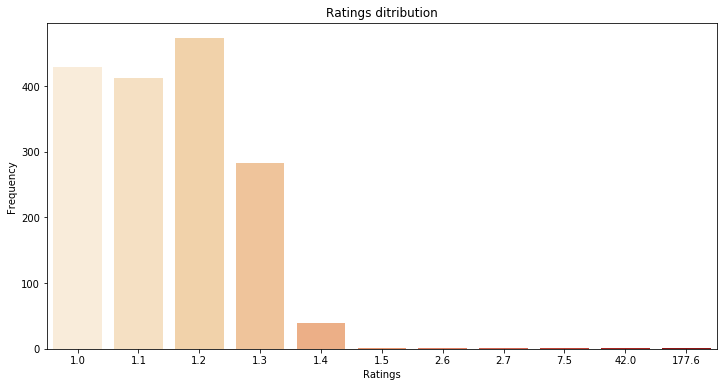

In [576]:
data = df2.rating.value_counts()
x = data.index
y = data.values
fig,ax = plt.subplots(figsize = (12,6))
g = sns.barplot(x,y,palette = 'OrRd', ax = ax)
ax.set(xlabel = 'Ratings', ylabel = 'Frequency' , title = 'Ratings ditribution')
plt.show()

## Analyses

- Most of dog ratings range from 10 to 14 
- The majority are 12 out of 10

## Visualization 2 : Bar chart to measure the popularity of dogs

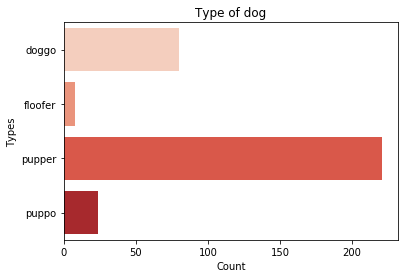

In [577]:
data = df_master_clean.groupby('types_of_dogs')['tweet_id'].count()
ax = sns.barplot(y = data.index , x = data.values , palette = 'Reds')
ax.set (xlabel = 'Count', ylabel = 'Types' , title = 'Type of dog')
plt.show()

## Analyses

- The most popular dogs is pupper while 
- The least popular dog is floofer

**The most popular dogs' name**

In [578]:
df_master_clean.name.value_counts().head(1)

Charlie    44
Name: name, dtype: int64

**The leat popular dogs' name**

In [579]:
df_master_clean.name.value_counts().tail(1)

Pancake    4
Name: name, dtype: int64

# End of Notebook